# **Regression & Its Evaluation**

---



Question 1: What is Simple Linear Regression?

Anawer:
Simple Linear Regression is a statistical method used to model the relationship between two variables: one independent variable (X) and one dependent variable (Y). It fits a straight line through the data in such a way that the difference between the actual values and the predicted values is minimized.

The mathematical form is:

Y = mX + c

Where:
• m = slope of the line (rate of change in Y for a unit change in X)
• c = intercept (value of Y when X = 0)

Simple linear regression is used to predict the value of the dependent variable based on the value of the independent variable and to understand the strength and direction of their relationship.


---



Question 2: What are the key assumptions of Simple Linear Regression?


Answer:


The key assumptions of Simple Linear Regression are:

Linearity:
The relationship between the independent variable (X) and the dependent variable (Y) must be linear. This means changes in X lead to proportional changes in Y.

Independence of Errors:
The residuals (errors) should be independent of each other. In other words, one error should not influence another.

Homoscedasticity:
The variance of the residuals should remain constant across all values of X. There should be no patterns of increasing or decreasing spread.

Normality of Errors:
The residuals should be approximately normally distributed. This is important for valid hypothesis testing and confidence intervals.

No Significant Outliers:
Extreme values should not distort the relationship, as outliers can heavily impact the regression line.


---



Question 3: What is heteroscedasticity, and why is it important to address in regression models?


Answer:


 Heteroscedasticity refers to a situation in a regression model where the variance of the residuals (errors) is not constant across all levels of the independent variable. Instead of having a uniform spread, the errors may fan out or contract as X changes.
In simple terms, the errors become uneven—sometimes small, sometimes large—depending on the value of X.
Why it is important to address:
Heteroscedasticity violates a key assumption of regression, and when it occurs:
• It makes the standard errors unreliable, which can lead to incorrect t-tests and confidence intervals.
• It increases the chance of making wrong conclusions about the significance of predictors.
• It reduces the efficiency of the regression model, meaning the estimated coefficients may still be unbiased but are no longer the “best” or most precise estimates.
Addressing heteroscedasticity ensures that the regression results are statistically valid and trustworthy.


---



Question 4: What is Multiple Linear Regression?


Answer:


Multiple Linear Regression is a statistical method used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, …). It extends simple linear regression by allowing multiple factors to influence the outcome.

The general equation is:

Y = b₀ + b₁X₁ + b₂X₂ + b₃X₃ + … + ε

Where:
• b₀ = intercept
• b₁, b₂, b₃… = coefficients showing how much Y changes with a one-unit change in each X
• ε = error term

Multiple Linear Regression helps in prediction, understanding relationships, and identifying which independent variables significantly affect the dependent variable, while accounting for the influence of other factors.


---




Question 5: What is polynomial regression, and how does it differ from linear
regression?

Answer:

Polynomial regression is a regression technique used to model relationships that are non-linear by introducing polynomial terms of the independent variable (such as X², X³, etc.). Even though the equation includes higher-degree terms, the model is still considered a form of linear regression because the coefficients are estimated linearly.

A typical polynomial regression equation looks like:

Y = b₀ + b₁X + b₂X² + b₃X³ + … + ε

How it differs from linear regression:
• Shape of the relationship:
Linear regression fits a straight line, while polynomial regression fits a curved line to capture more complex patterns in the data.

• Model flexibility:
Polynomial regression can model non-linear trends, whereas simple linear regression is limited to linear relationships.

• Complexity:
Polynomial models are more flexible but can easily become more complex and may risk overfitting if the degree is too high.

In short, linear regression captures straight-line relationships, while polynomial regression captures curved ones.





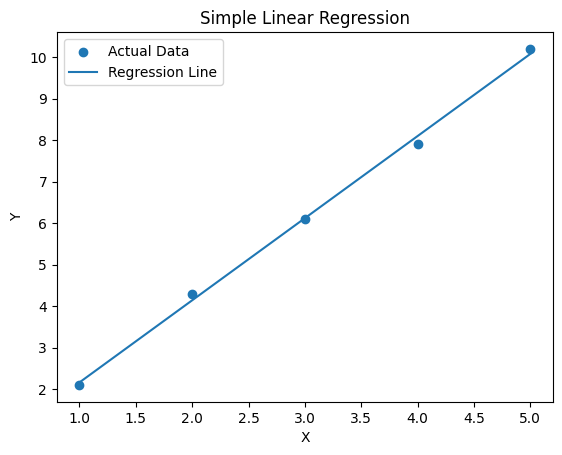

In [1]:
'''Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data: ● X = [1, 2, 3, 4, 5] ● Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points.'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plotting the data points and regression line
plt.scatter(X, Y, label="Actual Data")
plt.plot(X, Y_pred, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [2]:
'''Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)'''

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
df = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

# Multiple Linear Regression
X = df[["Area", "Rooms"]]
y = df["Price"]

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print("Regression Summary:\n")
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i + 1)
    for i in range(len(X.columns))
]

print("\nVIF Results:\n")
print(vif_data)


Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 13 Nov 2025   Prob (F-statistic):             0.0377
Time:                        15:16:07   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.29

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


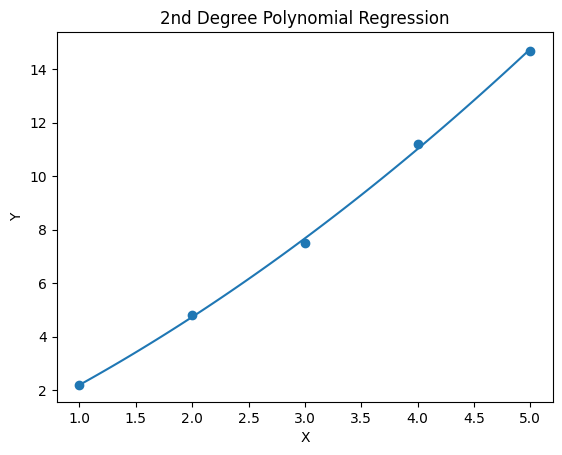

In [4]:
'''Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial Transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions for smooth curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, Y)
plt.plot(X_range, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()



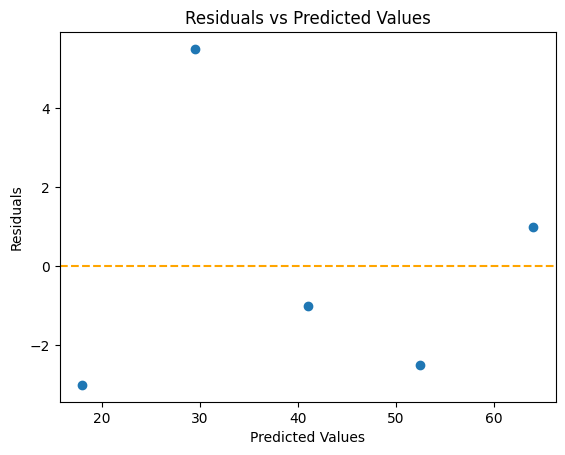

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
'''
Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions and residuals
y_pred = model.predict(X)
residuals = Y - y_pred

# Residuals Plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Print residuals for reference
print("Residuals:", residuals)


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


Answer:
When building a house price prediction model, detecting heteroscedasticity and multicollinearity indicates that the regression assumptions are being violated. To ensure a reliable and robust model, the following steps should be taken:
1. Addressing Heteroscedasticity:
Heteroscedasticity occurs when the variance of the residuals is not constant across the range of predicted values. To fix this:
• Apply transformations such as log, square root, or Box–Cox transformations on the dependent variable (e.g., using log(Price) instead of Price). This often stabilizes the variance.
• Use Weighted Least Squares (WLS) instead of Ordinary Least Squares. WLS assigns weights to observations based on the size of their errors, reducing the impact of high-variance points.
• Add or modify features that might be missing. Sometimes heteroscedasticity indicates that an important variable (e.g., neighborhood quality or age of property) is not included in the model.
• Use robust standard errors (e.g., heteroscedasticity-consistent estimators like HC1 or HC3) to obtain valid inference even if heteroscedasticity remains.
2. Addressing Multicollinearity:
Multicollinearity occurs when two or more independent variables are highly correlated, causing unstable coefficient estimates. Steps to fix it include:
• Remove one of the correlated variables if both features carry similar information (e.g., area and number of rooms often correlate strongly).
• Combine correlated features into a single variable, such as total square footage per room or using dimensionality reduction techniques like Principal Component Analysis (PCA).
• Standardize the features, which can help stabilize models sensitive to feature scale.
• Use regularization techniques such as Ridge Regression or Lasso.
– Ridge reduces the impact of multicollinearity by penalizing large coefficients.
– Lasso can eliminate unnecessary correlated features entirely by shrinking some coefficients to zero.
3. Re-evaluating the Model:
After fixing these issues:
• Refit the model and re-check residual plots, VIF values, and statistical tests.
• Compare model performance using metrics like RMSE, MAE, or R².
• Validate the model using cross-validation to ensure it generalizes well.
Conclusion:
By applying transformations, using weighted or regularized models, removing or combining correlated features, and validating the updated model, a more stable, interpretable, and accurate house price prediction model can be achieved.